In [1]:
from pyomo.environ import *
import numpy as np
import matplotlib.pyplot as plt
import bisect
from pyomo.opt import SolverStatus, TerminationCondition

In [2]:
m1 = ConcreteModel()
m1.y = Var(bounds=(-1, 1))
m1.x1 = Var(bounds=(0, 1))
m1.x2 = Var(bounds=(0, None))
m1.c1 = Constraint(expr=m1.x2**2 == m1.y**2)
m1.c2 = Constraint(expr=m1.x2 == (m1.x1)**2)
m1.obj_expr = Expression(expr=-m1.x1)

In [3]:
def v_1(y):  
    return - np.sqrt(np.abs(y))

In [21]:
delta = 1
add_node_num=20
n_samples=5
tolerance=1e-8

solver = SolverFactory('gurobi')
solver.options['FeasibilityTol'] = tolerance
solver.options['OptimalityTol'] = tolerance

y_nodes = np.linspace(-delta, delta, n_samples).tolist()
new_node = 0


print("  ")
print("  ")
#print(add_node_num)

# reset bounds
m1.y.setlb(-delta)
m1.y.setub(delta)

adds=[]
mslist=[]

for k in range(add_node_num+1):
    adds.append(k)
    print('add node number ',k)
    
    if new_node not in y_nodes:
        bisect.insort(y_nodes, new_node)


    as_nodes = [v_1(y) for y in y_nodes]

    if hasattr(m1, 'As'):
        m1.del_component('As')
    if hasattr(m1, 'pw'):
        m1.del_component('pw')
    if hasattr(m1, 'obj'):
        m1.del_component('obj')
    #model_list[i].del_component('y')
    #model_list[i].y = Var(bounds=(-delta, delta))
    m1.As = Var()
    m1.pw = Piecewise(
        m1.As, m1.y,
        pw_pts=y_nodes,
        f_rule=as_nodes,
        pw_constr_type='EQ',
        pw_repn='SOS2'
    )


    
    '''
    old_expr = model_list[i].obj.expr
    model_list[i].del_component('obj')
    model_list[i].obj = Objective(expr=old_expr - model_list[i].As, sense=minimize)
    '''
    m1.obj = Objective(expr=m1.obj_expr - m1.As, sense=minimize)
    #'''
    if k == 16:
        print('  ')
        print("16start")
        results = solver.solve(m1,tee = True)
        print(y_nodes)
        aaa = y_nodes
        bbb = as_nodes
        ccc = results.problem.lower_bound
        print("16end")
        print('  ')
    #'''


    results = solver.solve(m1)
    ms_1 = results.problem.lower_bound
    new_node = value(m1.y)
    print('new node is ',new_node)
    print('ms is ',ms_1)
    print(' ')
    print(' ')
    mslist.append(np.log(-ms_1))


  
  
add node number  0
new node is  0.12507891615570035
ms is  -0.1767907867025013
 
 
add node number  1
new node is  -0.12511837423354974
ms is  -0.17677773815248718
 
 
add node number  2
new node is  -0.03129257694067583
ms is  -0.08843231206881598
 
 
add node number  3
new node is  0.03125496643091148
ms is  -0.08841635769526374
 
 
add node number  4
new node is  -0.007830679695349153
ms is  -0.044225558706893445
 
 
add node number  5
new node is  0.007791533320877584
ms is  -0.04419873645335134
 
 
add node number  6
new node is  0.2812810561031228
ms is  -0.029441128636899017
 
 
add node number  7
new node is  -0.28130134216816216
ms is  -0.029430262822180753
 
 
add node number  8
new node is  -0.0019487843292422125
ms is  -0.022128119357479378
 
 
add node number  9
new node is  0.0019617881449435675
ms is  -0.02209310249054945
 
 
add node number  10
new node is  0.07039614508965603
ms is  -0.01474429293644175
 
 
add node number  11
new node is  -0.07042245004369471
ms

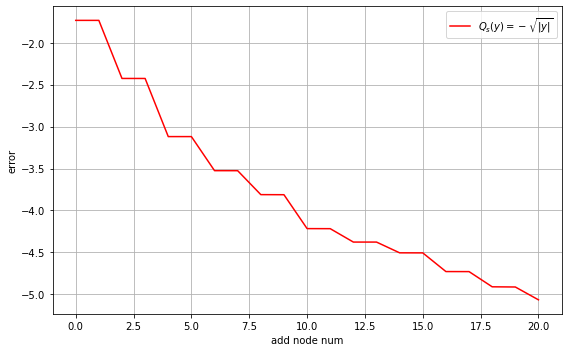

In [19]:
plt.figure(figsize=(8, 5))
plt.plot(adds, mslist, label=r'$Q_s(y) = -\sqrt{|y|}$', color='red')

plt.xlabel('add node num')
plt.ylabel('error')
#plt.title(f"Plot for {0:.1f} add nodes")
plt.legend()
plt.grid(True)
#plt.xlim(-0.2, 0.2)  
#plt.ylim(-0.5, 0)  

plt.tight_layout()

   
   
   
y node is  [-1.0, -0.7285721054599575, -0.5, -0.28145486641602036, -0.19545287973084255, -0.12511837423354974, -0.07035189727517822, -0.03125636684335061, -0.017605534237913632, -0.007812275265522572, -0.0019444407854235053, -0.00047374453219584697, 0.0, 0.0005030450253182653, 0.0019485540212610894, 0.007829272663095563, 0.01759302941526951, 0.031262297737373955, 0.07035796461650365, 0.12507891615570035, 0.19539055521694149, 0.28131680542870496, 0.5, 0.7285406638907524, 1.0]
y node length 25
ms is  0.006308636743360352


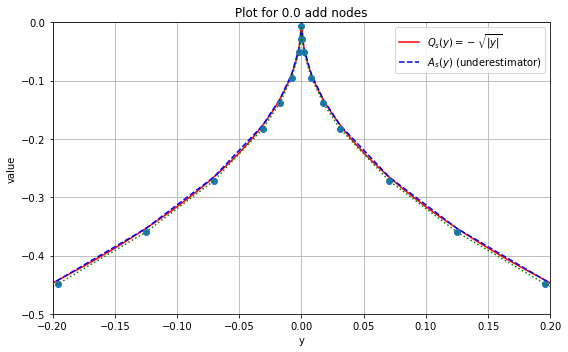

In [7]:
# y and z = |y|
y_vals = np.linspace(-delta, delta, 1001)
z_vals = np.abs(y_vals)

# define Qs(y)
Qs_vals2 = -np.sqrt(z_vals)

# As(y)
print("   ")
print("   ")
print("   ")
print('y node is ',aaa)
print('y node length',len(aaa))
print('ms is ',-ccc)
#print("ms value is ",results[i][4])
#print("y_opt value is ",results[i][5])
#z_nodes = abs(y_nodes)
#as_nodes = np.sqrt(z_nodes)
bbb2 = np.array(bbb)
#As_vals2 = np.interp(z_vals, aaa, bbb2)
#As_shifted_vals2 = As_vals2 + ccc

# make the plot
plt.figure(figsize=(8, 5))
plt.plot(y_vals, Qs_vals2, label=r'$Q_s(y) = -\sqrt{|y|}$', color='red')
#plt.plot(y_vals, As_vals2, label=r'$A_s(y)$ (underestimator)', color='blue', linestyle='--')
plt.plot(aaa, bbb2, label=r'$A_s(y)$ (underestimator)', color='blue', linestyle='--')
#plt.plot(y_vals, As_shifted_vals2, label=r'$A_s(y) + m_s$', color='green', linestyle=':')
plt.plot(aaa, bbb2+ccc, 'o')
plt.plot(aaa, bbb2+ccc, color='green', linestyle=':')
plt.xlabel('y')
plt.ylabel('value')
#plt.title('Correct: $A_s(y) + m_s$ is a global underestimator of $Q_s(y)$')
plt.title(f"Plot for {0:.1f} add nodes")
plt.legend()
plt.grid(True)
plt.xlim(-0.2, 0.2)  
plt.ylim(-0.5, 0)  

plt.tight_layout()

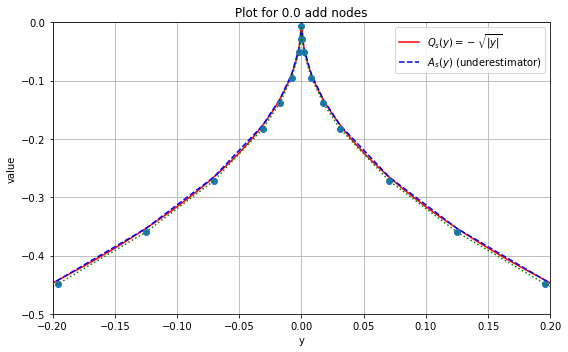

In [6]:
plt.figure(figsize=(8, 5))
plt.plot(y_vals, Qs_vals2, label=r'$Q_s(y) = -\sqrt{|y|}$', color='red')
plt.plot(aaa, bbb2, label=r'$A_s(y)$ (underestimator)', color='blue', linestyle='--')
plt.plot(aaa, bbb2+ccc, 'o')
plt.plot(aaa, bbb2+ccc, color='green', linestyle=':')
plt.xlabel('y')
plt.ylabel('value')
plt.title(f"Plot for {0:.1f} add nodes")
plt.legend()
plt.grid(True)
plt.xlim(-0.2, 0.2)  
plt.ylim(-0.5, 0)  

plt.tight_layout()

#### print("Missing points:")
for x in aaa:
    if x not in y_vals:
        print(f"{x:.6f} not in y_vals")


1.yvals中缺少aaa中的某些点
2.这是否会影响到求解过程？检查
3.图中（0附近的点外面）好像能找到对应更大的ms的点但没被求解器找到？
4.难道说不是最小是最大？？？

5.下面这个用tolerance替代一下看看

In [157]:
def simple_check(y_nodes, as_nodes, ms):
    assert len(y_nodes) == len(as_nodes), "length is not the same"
    
    y_vals = np.linspace(-1, 1, 10001)
    z_vals = np.abs(y_vals)
    Qs_vals = -np.sqrt(z_vals)
    as_list = np.interp(y_vals, y_nodes, as_nodes)

    selected_points = []
    


    for y, as_val in zip(y_vals, as_list):
        if (v_1(y) - as_val) < ms+tolerance:  
            selected_points.append((y, as_val))
    
    
    return selected_points

In [158]:
print(simple_check(aaa, bbb, ccc))

[]


In [13]:
m1 = ConcreteModel()
m1.y = Var(bounds=(-1, 1))
m1.x1 = Var(bounds=(0, 1))
m1.x2 = Var(bounds=(0, None))
m1.c1 = Constraint(expr=m1.x2**2 == m1.y**2)
m1.c2 = Constraint(expr=m1.x2 == (m1.x1)**2)
m1.obj = Objective(expr=-m1.x1, sense=minimize)

y_nodes = np.linspace(-1, 1, 5).tolist()
as_nodes = [v_1(y) for y in y_nodes]
    
m1.As = Var()
m1.pw = Piecewise(
    m1.As, m1.y,
    pw_pts=y_nodes,
    f_rule=as_nodes,
    pw_constr_type='EQ',
    pw_repn='INC'
)
original_expr = m1.obj.expr
m1.obj.deactivate()   
#model_list[i].del_component('obj')
m1.obj2 = Objective(expr=original_expr - m1.As, sense=minimize)
#m1.obj2 = Objective(expr=-m1.x1 - m1.As, sense=minimize)

#solver = SolverFactory('scip', executable='/Users/yinhuang/miniconda3/bin/scip')
solverg = SolverFactory('gurobi')
results = solverg.solve(m1)
print(results)


Problem: 
- Name: x1
  Lower bound: -0.17678943333361818
  Upper bound: -0.17677899799800684
  Number of objectives: 1
  Number of constraints: 10
  Number of variables: 11
  Number of binary variables: 3
  Number of integer variables: 3
  Number of continuous variables: 8
  Number of nonzeros: 22
  Sense: minimize
Solver: 
- Status: ok
  Return code: 0
  Message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Wall time: 0.04390406608581543
  Error rc: 0
  Time: 0.2446601390838623
Solution: 
- number of solutions: 0
  number of solutions displayed: 0

